### A. Data cleaning
- Recode predictive variables on both 2 datasets

### B. BMI_AVG_IMPUTE
- take average of 5 imputation datasets in BMI_AVG

### C. Use 'Race_Cat' 
 - missing in race was coded as a separate subgroup! 
 - combine into 3 subgroups 
 
### D. Dealing with duplicate values:
- Dropping duplicate patientID (8 dup)

### E. Grouping AGE_ENC_DATE1 into 5 subgroups

### F. Extract missing in strata (6 missing)  + reset_index

### G. Recode Lowest_Recent_Hypo_Cat
- replace NA = 0

### H. Recode 'Median_Recent_Hypo_Cat'
- replace NA = 0

### I. Extract needed variables

### J. OHE

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
# import csv
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
import os
path = '/Users/thanhng/osteo_experiment/'
os.chdir(path) 

In [4]:
data_osteo = pd.read_csv('osteo_impute_final.csv') 
print(data_osteo.shape)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(305180, 184)


In [31]:
data_osteo.iloc[:5, :20]

,_Imputation_,patientid,sex,Race,Ethnicity,DOB,ENC_DATE1,ENC_DATE2,Enc_Mth_Diff,Enc_Day_Diff,Age_Enc_Date1,Male,Race_Cat,status,stdStatus,DOD,censusDivision,Age_Group,Age_Quartile,Hyponatremia_Ever
0,1,0000d0d9bae6121ee69ab6b6bd9ed86754c3e56e,F,African American,Not Hispanic or Latino,07/07/1949,09/07/2000,08/26/2013,155.0,4736.0,51,0,1,A,1.0,NaN,South Atlantic,50-59,30-59,0
1,1,0000f67619788413e996797ec9821243e728c719,F,Caucasian,Not Hispanic or Latino,06/16/1932,03/26/2010,05/15/2013,38.0,1146.0,77,0,2,A,1.0,NaN,South Atlantic,70-79,60-79,0
2,1,00013b07a7c61d3e018938b754b5f412b8e14f76,F,African American,Not Hispanic or Latino,11/12/1963,08/21/2002,01/22/2013,125.0,3807.0,38,0,1,A,1.0,NaN,South Atlantic,30-39,30-59,0
3,1,00017ece5cf377eda65674f1ee640f66f9618019,F,NaN,Unknown,11/09/1942,04/11/2012,07/15/2013,15.0,460.0,69,0,0,A,1.0,NaN,South Atlantic,60-69,60-79,0
4,1,00019ad6f4ad37db7dd28bd2671f4e1f8c3acbd9,F,Caucasian,Unknown,12/22/1924,10/20/2010,08/07/2013,34.0,1022.0,85,0,2,NaN,1.0,NaN,South Atlantic,80-89,80+,0


In [5]:
data_osteo.columns

Index(['_Imputation_', 'patientid', 'sex', 'Race', 'Ethnicity', 'DOB',
       'ENC_DATE1', 'ENC_DATE2', 'Enc_Mth_Diff', 'Enc_Day_Diff',
       ...
       'Normal_Sodium_365', 'Sodium_2_Years', 'Sodium_GT_3_Years',
       'Sodium_1_Year', 'Sodium_Year_Cat', 'Hyponatremia_2_Years',
       'Hyponatremia_GT_3_Years', 'Hyponatremia_1_Year',
       'Hyponatremia_Year_Cat', 'race_cat1'],
      dtype='object', length=184)

### A. BMI_AVG_IMPUTATION

In [6]:
data_osteo['_Imputation_'].value_counts()

5    61036
4    61036
3    61036
2    61036
1    61036
Name: _Imputation_, dtype: int64

In [ ]:
#check if imputation dataset has same value, only different in BMI and 'imputation

In [75]:
osteo = data_osteo.filter(['_Imputation_', 'BMI_Avg', 'Age_Enc_Date1'])
# osteo
osteo_1 = osteo.groupby('_Imputation_').tail(3)   
osteo_1
#  --> all the cols are the same, except BMI_Avg

,_Imputation_,BMI_Avg,Age_Enc_Date1
61033,1,29.867651,76
61034,1,14.383965,68
61035,1,29.459819,58
122069,2,29.912388,76
122070,2,20.842370,68
122071,2,29.459819,58
183105,3,25.363187,76
183106,3,24.262182,68
183107,3,29.459819,58
244141,4,23.538260,76


In [ ]:
# add a new col 'index_in_dataset' to each dataset, then group by that level
# take the avg of BMI_Avg of 5 imputation, combine into 1 dataset
#first, try on small data portion if the direction is correct

In [77]:
osteo_1['index_in_dataset'] = [1,2,3, 1,2,3, 1,2,3, 1,2,3, 1,2,3]
osteo_1

/Users/thanhng/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,_Imputation_,BMI_Avg,Age_Enc_Date1,index_in_dataset
61033,1,29.867651,76,1
61034,1,14.383965,68,2
61035,1,29.459819,58,3
122069,2,29.912388,76,1
122070,2,20.842370,68,2
122071,2,29.459819,58,3
183105,3,25.363187,76,1
183106,3,24.262182,68,2
183107,3,29.459819,58,3
244141,4,23.538260,76,1


In [76]:
osteo_1['BMI_Avg'].value_counts()

29.459819    5
25.363187    1
30.567263    1
29.912388    1
31.777998    1
23.538260    1
24.916915    1
29.867651    1
20.842370    1
14.383965    1
24.262182    1
Name: BMI_Avg, dtype: int64

In [78]:
osteo_2 = osteo_1.groupby('index_in_dataset').agg(np.mean) 
osteo_2
#  s.groupby(level=['first', 'second']).sum()

,_Imputation_,BMI_Avg,Age_Enc_Date1
index_in_dataset,,,
1,3,26.719680,76
2,3,24.366756,68
3,3,29.459819,58


In [ ]:
#now try on all datasets

In [6]:
index_in_dataset = list(range(1,61037)) *5
data_osteo['index_in_dataset'] = index_in_dataset

In [101]:
#extract small portion to see if correct
osteo_3 = data_osteo.filter(['_Imputation_', 'index_in_dataset', 'BMI_Avg', 'Age_Enc_Date1'])
osteo_4 = osteo_3.groupby('_Imputation_').tail(3) 
osteo_4

,_Imputation_,index_in_dataset,BMI_Avg,Age_Enc_Date1
61033,1,61034,29.867651,76
61034,1,61035,14.383965,68
61035,1,61036,29.459819,58
122069,2,61034,29.912388,76
122070,2,61035,20.842370,68
122071,2,61036,29.459819,58
183105,3,61034,25.363187,76
183106,3,61035,24.262182,68
183107,3,61036,29.459819,58
244141,4,61034,23.538260,76


In [102]:
osteo_4.groupby('index_in_dataset').agg(np.mean) 

,_Imputation_,BMI_Avg,Age_Enc_Date1
index_in_dataset,,,
61034,3,26.719680,76
61035,3,24.366756,68
61036,3,29.459819,58


In [9]:
#take only imputation, index_in_dataset, BMI_Avg 
final= data_osteo.filter(['_Imputation_', 'index_in_dataset', 'BMI_Avg', 'Age_Enc_Date1'])
final_data = final.groupby('index_in_dataset').agg(np.mean)
final_data_1 = final_data.filter(['index_in_dataset', 'BMI_Avg'])
final_data_1['_Imputation_'] = 1
# final_data_1

#rename BMI_Avg_Edit
final_data_1.rename(columns={'BMI_Avg':'BMI_Avg_imputed'}, inplace = True)
final_data_2 = final_data_1.reset_index()
final_data_2.rename(columns = {'index_in_dataset': 'index_in_THIS_dataset'}, inplace = True)
final_data_2

#extract first imputation
final_data_3 = data_osteo.iloc[:61036, :] 
final_data_3['BMI_Avg_imputed'] = final_data_2['BMI_Avg_imputed']
final_data_3

/Users/thanhng/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,_Imputation_,patientid,sex,Race,Ethnicity,DOB,ENC_DATE1,ENC_DATE2,Enc_Mth_Diff,Enc_Day_Diff,...,Sodium_GT_3_Years,Sodium_1_Year,Sodium_Year_Cat,Hyponatremia_2_Years,Hyponatremia_GT_3_Years,Hyponatremia_1_Year,Hyponatremia_Year_Cat,race_cat1,index_in_dataset,BMI_Avg_imputed
0,1,0000d0d9bae6121ee69ab6b6bd9ed86754c3e56e,F,African American,Not Hispanic or Latino,07/07/1949,09/07/2000,08/26/2013,155.0,4736.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,37.834028
1,1,0000f67619788413e996797ec9821243e728c719,F,Caucasian,Not Hispanic or Latino,06/16/1932,03/26/2010,05/15/2013,38.0,1146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,32.948625
2,1,00013b07a7c61d3e018938b754b5f412b8e14f76,F,African American,Not Hispanic or Latino,11/12/1963,08/21/2002,01/22/2013,125.0,3807.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,33.388021
3,1,00017ece5cf377eda65674f1ee640f66f9618019,F,NaN,Unknown,11/09/1942,04/11/2012,07/15/2013,15.0,460.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,28.308928
4,1,00019ad6f4ad37db7dd28bd2671f4e1f8c3acbd9,F,Caucasian,Unknown,12/22/1924,10/20/2010,08/07/2013,34.0,1022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,22.666667
5,1,00019bf998e0b7d1f1c201f9c93814d13204459c,F,African American,Not Hispanic or Latino,06/05/1923,01/07/2000,12/08/2009,119.0,3623.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,28.075706
6,1,0001d830add6798a4de0dc1dc4c9a0cccaaa3b5a,F,African American,Not Hispanic or Latino,04/20/1940,02/14/2000,02/20/2013,156.0,4755.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7,43.520334
7,1,000366c4043f5929da611fbbd7a6f6527ec1f112,M,Caucasian,Not Hispanic or Latino,11/19/1931,03/16/2009,09/05/2013,54.0,1634.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,8,31.745965
8,1,0004146947f81a5d797a452ee58b96a3f9d8733a,F,Caucasian,Not Hispanic or Latino,02/14/1942,09/22/2006,04/23/2013,79.0,2405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,9,28.295250
9,1,0004b8b1c0b08ffc43b139a2718cff225a24e0b1,F,Caucasian,Not Hispanic or Latino,08/04/1920,08/07/2002,09/29/2013,133.0,4071.0,...,1.0,0.0,3.0,0.0,1.0,0.0,3.0,2,10,19.973046


In [10]:
final_data_3.to_csv('osteo_BMI_imputed.csv')

### B. Changing y variable
Changing y variable into binary. <br> 
__'Osteoporosis_code'__ is the <u>binary classification result</u> (have osteo or not). However in the raw data it has 5 values, corresponding to the disease code. --> need to change them to 1, and fill NA with 0

In [53]:
data_osteo = pd.read_csv('osteo_BMI_imputed.csv') 

In [4]:
data_osteo.shape

(61036, 187)

In [13]:
data_osteo.columns

Index(['Unnamed: 0', '_Imputation_', 'patientid', 'sex', 'Race', 'Ethnicity',
       'DOB', 'ENC_DATE1', 'ENC_DATE2', 'Enc_Mth_Diff',
       ...
       'Sodium_GT_3_Years', 'Sodium_1_Year', 'Sodium_Year_Cat',
       'Hyponatremia_2_Years', 'Hyponatremia_GT_3_Years',
       'Hyponatremia_1_Year', 'Hyponatremia_Year_Cat', 'race_cat1',
       'index_in_dataset', 'BMI_Avg_imputed'],
      dtype='object', length=187)

In [54]:
#copy to keep original osteo_code
data_osteo['osteo_predict'] = data_osteo['Osteoporosis_code'].copy() 

#recode in BONE FRACTURE dataset
data_osteo['osteo_predict'] = data_osteo['osteo_predict'].replace(733.00, 1) 
data_osteo['osteo_predict'] = data_osteo['osteo_predict'].replace(733.01, 1) 
data_osteo['osteo_predict'] = data_osteo['osteo_predict'].replace(733.09, 1)
data_osteo['osteo_predict'] = data_osteo['osteo_predict'].replace(733.02, 1)
data_osteo['osteo_predict'] = data_osteo['osteo_predict'].replace(733.03, 1)  

# fill NA = 0, NA = no disease
data_osteo['osteo_predict'].fillna(0, inplace=True) 

#check result: if diagnosis w disease = 1, otherwise = 0
print(data_osteo['Osteoporosis_code'].value_counts())
print('\n', data_osteo['osteo_predict'].value_counts())  


733.00    27970
733.01     1421
733.09      898
733.02      182
733.03       47
Name: Osteoporosis_code, dtype: int64

 1.0    30518
0.0    30518
Name: osteo_predict, dtype: int64


### checking sex based on disease diagnosis

In [13]:
pd.crosstab(index=data_osteo["sex"], columns=data_osteo["osteo_predict"], margins = True)

osteo_predict,0.0,1.0,All
sex,,,
F,26933,26933,53866
M,3585,3585,7170
All,30518,30518,61036


In [14]:
pd.crosstab(index=data_osteo["Race_Cat"], columns=data_osteo["osteo_predict"], margins = True)

osteo_predict,0.0,1.0,All
Race_Cat,,,
0,2568,2568,5136
1,8630,8630,17260
2,18224,18224,36448
3,61,61,122
4,1016,1016,2032
5,2,2,4
6,2,2,4
7,15,15,30
All,30518,30518,61036


### female has osteo more than male --> expect that error rate of female > error rate of male if train separately

### C. Use RACE_CAT instead of race, 
- name Race_Cat to category
- collapse into only 3 categories

In [46]:
data_osteo['Race_Cat'].value_counts()

2    36448
1    17260
0     5136
4     2032
3      122
7       30
6        4
5        4
Name: Race_Cat, dtype: int64

In [56]:
#combine race in osteo dataset
race_combine = []
for i in data_osteo['Race_Cat']:
    if i == 2:
        race_combine.append('white')        
    if i == 1:
        race_combine.append('black')
    if i ==0 or i ==3 or i == 4 or i ==5 or i ==6 or i ==7:
        race_combine.append('others')   

print(len(race_combine))
import collections
counter=collections.Counter(race_combine)
print(counter)

data_osteo['Race_Cat_combine'] = race_combine
print('\n', pd.crosstab(index=data_osteo["Race_Cat_combine"], columns=data_osteo["osteo_predict"], margins = True)) 

61036
Counter({'white': 36448, 'black': 17260, 'others': 7328})

 osteo_predict       0.0    1.0    All
Race_Cat_combine                     
black              8630   8630  17260
others             3664   3664   7328
white             18224  18224  36448
All               30518  30518  61036


### D. Dropping duplicate patientID

In [57]:
# remove duplicate patientID in osteo dataset
data_osteo['is_dup_patientID'] = data_osteo['patientid'].duplicated()
data_osteo_nodup = data_osteo.loc[data_osteo['is_dup_patientID'] == False] 
print('# of duplicate: ', data_osteo.loc[data_osteo['is_dup_patientID'] == True].shape[0])
print('old shape: ', data_osteo.shape)
print('new shape: ', data_osteo_nodup.shape ) 

# of duplicate:  8
old shape:  (61036, 190)
new shape:  (61028, 190)


### --> NEW datashape: (61028, 190)

### E. Grouping Age_Enc_Date1 into 5 subgroups

In [9]:
data_osteo_nodup['Age_Enc_Date1'].describe()

count    61028.000000
mean        65.752147
std         14.935276
min          0.000000
25%         56.000000
50%         67.000000
75%         77.000000
max        102.000000
Name: Age_Enc_Date1, dtype: float64

In [11]:
data_osteo_nodup['Age_Enc_Date1'].isna().sum()

0

In [59]:
#combine age in osteo dataset

age_combine_osteo = []
for i in data_osteo_nodup['Age_Enc_Date1']:
    if i <30:
        age_combine_osteo.append('less_than_30')
    if i >=30 and i <50:
        age_combine_osteo.append('from_30_to_50')  
    if i >=50 and i <70:
        age_combine_osteo.append('from_50_to_70')
    if i >=70 and i <80:
        age_combine_osteo.append('from_70_to_80')
    if i >=80:
        age_combine_osteo.append('more_than_80')

print('age_combine len: ',len(age_combine_osteo))
print('dataset len:', data_osteo_nodup.shape)

#now add Age_combine to new dataset
data_osteo_nodup['Age_combine'] = age_combine_osteo

#check if age_combine categorize correctly
# data_osteo_nodup.filter(['Age_Enc_Date1', 'Age_combine'])

pd.crosstab(index=data_osteo_nodup["Age_combine"], columns=data_osteo_nodup["osteo_predict"], margins = True)

age_combine len:  61028
dataset len: (61028, 191)


/Users/thanhng/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


osteo_predict,0.0,1.0,All
Age_combine,,,
from_30_to_50,3632,3632,7264
from_50_to_70,12955,12955,25910
from_70_to_80,7356,7356,14712
less_than_30,492,492,984
more_than_80,6080,6078,12158
All,30515,30513,61028


In [60]:
pd.crosstab(index=data_osteo_nodup["Age_combine"], columns=data_osteo_nodup["osteo_predict"], margins = True)/data_osteo_nodup.shape[0]

osteo_predict,0.0,1.0,All
Age_combine,,,
from_30_to_50,0.059514,0.059514,0.119027
from_50_to_70,0.212280,0.212280,0.424559
from_70_to_80,0.120535,0.120535,0.241070
less_than_30,0.008062,0.008062,0.016124
more_than_80,0.099626,0.099594,0.199220
All,0.500016,0.499984,1.000000


Text(0.5,1,'osteo predict based on age of OSTEOPOROSIS dataset')

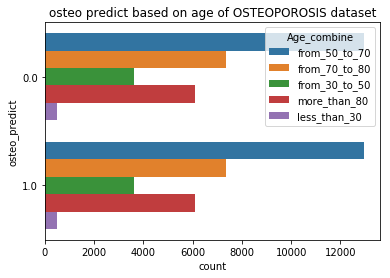

In [22]:
ax = sns.countplot(y="osteo_predict", hue="Age_combine", data=data_osteo_nodup)
ax.set_title("osteo predict based on age of OSTEOPOROSIS dataset")

In [ ]:
# --> rank 1st in frequency is 50_70
# MORE THAN 80 rank 3rd,


Text(0.5,1,'Age demographic of OSTEOPOROSIS dataset')

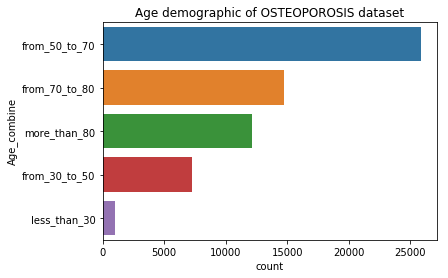

In [24]:
# check age demographic without specify osteo_predict  
ax = sns.countplot(y = 'Age_combine', data = data_osteo_nodup, 
             order = data_osteo_nodup['Age_combine'].value_counts().index) 
ax.set_title("Age demographic of OSTEOPOROSIS dataset") 

In [25]:
osteo_gender_table = pd.crosstab(index=data_osteo_nodup["sex"], columns=data_osteo_nodup["osteo_predict"], margins = True)
osteo_gender_table 

osteo_predict,0.0,1.0,All
sex,,,
F,26930,26928,53858
M,3585,3585,7170
All,30515,30513,61028


### F. Extract missing in strata 

In [61]:
#extract strata not in pair (maybe the missing pieces were drop during data cleaning)
missing_strata = data_osteo_nodup.groupby('Strata').filter(lambda x: len(x) ==1)
missing_strata

,Unnamed: 0,_Imputation_,patientid,sex,Race,Ethnicity,DOB,ENC_DATE1,ENC_DATE2,Enc_Mth_Diff,...,Hyponatremia_GT_3_Years,Hyponatremia_1_Year,Hyponatremia_Year_Cat,race_cat1,index_in_dataset,BMI_Avg_imputed,osteo_predict,Race_Cat_combine,is_dup_patientID,Age_combine
911,911,1,03dc9be831da5ff2bb82e3fd4513f56fdd24a50d,F,Caucasian,Not Hispanic or Latino,01/26/1942,03/09/2004,07/11/2013,112.0,...,NaN,NaN,NaN,2,912,25.215191,1.0,white,False,from_50_to_70
10783,10783,1,2dce9cf9d0ecd79fb3ed917a0038ebdf9092d33e,F,African American,Unknown,09/09/1921,01/14/2003,05/29/2010,88.0,...,NaN,NaN,NaN,1,10784,31.944618,1.0,black,False,more_than_80
20712,20712,1,579429f2d0bb6b55d6127ed6a2f2dce58f5a128a,F,African American,Unknown,01/17/1915,02/15/2000,12/01/2009,118.0,...,NaN,NaN,NaN,1,20713,27.327884,0.0,black,False,more_than_80
29938,29938,1,7e811a98bea4f8747693022ca78a2189c2f15ed1,F,Caucasian,Unknown,11/11/1930,04/26/2011,07/15/2011,3.0,...,NaN,NaN,NaN,2,29939,22.968750,0.0,white,False,more_than_80
33365,33365,1,8c96a81fd8c035708923ce1d87b75ff5083f965c,F,Caucasian,Not Hispanic or Latino,01/04/1948,06/19/2004,09/16/2013,111.0,...,NaN,NaN,NaN,2,33366,22.176920,0.0,white,False,from_50_to_70
50699,50699,1,d51377ff3dade0fece4ca9020d5f223264064244,F,Caucasian,Unknown,01/29/1920,11/19/2002,07/20/2006,44.0,...,NaN,NaN,NaN,2,50700,32.039287,0.0,white,False,more_than_80


In [62]:
data_osteo_nodup_2 = data_osteo_nodup.drop(missing_strata.index, axis = 0)
print('before drop missing in strata, data.shape = ', data_osteo_nodup.shape)
print('after dropping: ', data_osteo_nodup_2.shape) 

before drop missing in strata, data.shape =  (61028, 191)
after dropping:  (61022, 191)


In [63]:
data_osteo_nodup_3 = data_osteo_nodup_2.copy()
data_osteo_nodup_3 = data_osteo_nodup_3.reset_index()
data_osteo_nodup_3

,index,Unnamed: 0,_Imputation_,patientid,sex,Race,Ethnicity,DOB,ENC_DATE1,ENC_DATE2,...,Hyponatremia_GT_3_Years,Hyponatremia_1_Year,Hyponatremia_Year_Cat,race_cat1,index_in_dataset,BMI_Avg_imputed,osteo_predict,Race_Cat_combine,is_dup_patientID,Age_combine
0,0,0,1,0000d0d9bae6121ee69ab6b6bd9ed86754c3e56e,F,African American,Not Hispanic or Latino,07/07/1949,09/07/2000,08/26/2013,...,NaN,NaN,NaN,1,1,37.834028,0.0,black,False,from_50_to_70
1,1,1,1,0000f67619788413e996797ec9821243e728c719,F,Caucasian,Not Hispanic or Latino,06/16/1932,03/26/2010,05/15/2013,...,NaN,NaN,NaN,2,2,32.948625,0.0,white,False,from_70_to_80
2,2,2,1,00013b07a7c61d3e018938b754b5f412b8e14f76,F,African American,Not Hispanic or Latino,11/12/1963,08/21/2002,01/22/2013,...,NaN,NaN,NaN,1,3,33.388021,0.0,black,False,from_30_to_50
3,3,3,1,00017ece5cf377eda65674f1ee640f66f9618019,F,NaN,Unknown,11/09/1942,04/11/2012,07/15/2013,...,NaN,NaN,NaN,0,4,28.308928,0.0,others,False,from_50_to_70
4,4,4,1,00019ad6f4ad37db7dd28bd2671f4e1f8c3acbd9,F,Caucasian,Unknown,12/22/1924,10/20/2010,08/07/2013,...,NaN,NaN,NaN,2,5,22.666667,1.0,white,False,more_than_80
5,5,5,1,00019bf998e0b7d1f1c201f9c93814d13204459c,F,African American,Not Hispanic or Latino,06/05/1923,01/07/2000,12/08/2009,...,NaN,NaN,NaN,1,6,28.075706,1.0,black,False,from_70_to_80
6,6,6,1,0001d830add6798a4de0dc1dc4c9a0cccaaa3b5a,F,African American,Not Hispanic or Latino,04/20/1940,02/14/2000,02/20/2013,...,NaN,NaN,NaN,1,7,43.520334,0.0,black,False,from_50_to_70
7,7,7,1,000366c4043f5929da611fbbd7a6f6527ec1f112,M,Caucasian,Not Hispanic or Latino,11/19/1931,03/16/2009,09/05/2013,...,NaN,NaN,NaN,2,8,31.745965,1.0,white,False,from_70_to_80
8,8,8,1,0004146947f81a5d797a452ee58b96a3f9d8733a,F,Caucasian,Not Hispanic or Latino,02/14/1942,09/22/2006,04/23/2013,...,NaN,NaN,NaN,2,9,28.295250,1.0,white,False,from_50_to_70
9,9,9,1,0004b8b1c0b08ffc43b139a2718cff225a24e0b1,F,Caucasian,Not Hispanic or Latino,08/04/1920,08/07/2002,09/29/2013,...,1.0,0.0,3.0,2,10,19.973046,0.0,white,False,more_than_80


### After reset index and drop missing in strata, check if other demographics (gender, age, race) still in pair in positive/negative osteo_predict

In [64]:
pd.crosstab(index=data_osteo_nodup_3["Race_Cat_combine"], columns=data_osteo_nodup_3["osteo_predict"], margins = True)

osteo_predict,0.0,1.0,All
Race_Cat_combine,,,
black,8628,8628,17256
others,3664,3664,7328
white,18219,18219,36438
All,30511,30511,61022


In [65]:
pd.crosstab(index=data_osteo_nodup_3["sex"], columns=data_osteo_nodup_3["osteo_predict"], margins = True)

osteo_predict,0.0,1.0,All
sex,,,
F,26926,26926,53852
M,3585,3585,7170
All,30511,30511,61022


In [66]:
pd.crosstab(index=data_osteo_nodup_3["Age_combine"], columns=data_osteo_nodup_3["osteo_predict"], margins = True)

osteo_predict,0.0,1.0,All
Age_combine,,,
from_30_to_50,3632,3632,7264
from_50_to_70,12954,12954,25908
from_70_to_80,7356,7356,14712
less_than_30,492,492,984
more_than_80,6077,6077,12154
All,30511,30511,61022


### G. Recode Lowest_Recent_Hypo_Cat, 
### replace NA = 0! 

In [33]:
#check missing
data_osteo_nodup_3['Lowest_Recent_Hypo_Cat'].isna().sum()

57407

In [75]:
#recode here replace NA = 0! 
data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Lowest_Recent_Hypo_Cat'].copy()

data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'].replace(1, 0)
data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'].replace(2, 1)
data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'].replace(3, 2)
data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'].replace(4, 3)    
data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'].fillna(0, inplace=True) 

data_osteo_nodup_3['Lowest_Recent_Hypo_Cat_edit'].value_counts()

0.0    57413
1.0     2727
2.0      659
3.0      223
Name: Lowest_Recent_Hypo_Cat_edit, dtype: int64

## H. Recode 'Median_Recent_Hypo_Cat'

In [35]:
print(data_osteo_nodup_3['Median_Recent_Hypo_Cat'].value_counts(), '\n')
print('# of missing: ', data_osteo_nodup_3['Median_Recent_Hypo_Cat'].isna().sum())

2.0    1668
1.0    1532
3.0     343
4.0      72
Name: Median_Recent_Hypo_Cat, dtype: int64 

# of missing:  57407


In [76]:
#copy original
data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Median_Recent_Hypo_Cat'].copy()

# #recode
data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'].replace(1,0)
data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'].replace(2,1)
data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'].replace(3,2)
data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'] = data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'].replace(4,3)

#fill NA with 0!!!
data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'].fillna(0, inplace=True) 
data_osteo_nodup_3['Median_Recent_Hypo_Cat_edit'].value_counts()

0.0    58939
1.0     1668
2.0      343
3.0       72
Name: Median_Recent_Hypo_Cat_edit, dtype: int64

In [77]:
data_osteo_nodup_3.shape

(61022, 194)

In [78]:
#EXPORT TO DATASET
data_osteo_nodup_3.to_csv('osteo_cleaning_BMI_impute.csv')

### Opional 

In [ ]:
osteo_dep_var i.chro_recent  bmi_avg alcohol_prior tobacco_prior   drug_antipsych_prior drug_estrogens_prior ///
 drug_glucocorticoids_prior  drug_nsaids_prior drug_opiates_prior   drug_thiazide_prior  drug_loop_diuretic_prior ///
 drug_pp_inhibitors_prior drug_progesterone_prior drug_seizure_prior drug_ssris_prior ///
 drug_tc_antidepress_prior heartdisease_prior liver_prior pulmdisease_prior cns_disease_prior  malignancy_prior , group(strata) 

    
    logit   osteo_dep_var  chronic_hyponatremia   alcohol_prior tobacco_prior   drug_antipsych_prior drug_estrogens_prior ///
 drug_glucocorticoids_prior  drug_nsaids_prior drug_opiates_prior  drug_thiazide_prior ///
 drug_pp_inhibitors_prior drug_progesterone_prior drug_seizure_prior drug_ssris_prior ///
 drug_tc_antidepress_prior heartdisease_prior liver_prior pulmdisease_prior cns_disease_prior  malignancy_prior if  _mi_m==0 , group(strata) or


In [67]:
# extract needed columns
osteo_extract_filter = data_osteo_nodup_3.filter(['Strata','sex','Race_Cat_combine', 'Age_combine','osteo_predict', 'BMI_Avg_imputed', 
     'Alcohol_Prior', 'Tobacco_Prior','Drug_antipsych_prior', 'Drug_Estrogens_prior', 'Drug_Glucocorticoids_prior',
    'Drug_Nsaids_prior', 'Drug_Opiates_prior', 'Drug_Thiazide_prior','Drug_Loop_Diuretic_Prior',
      'Drug_Pp_inhibitors_prior',  'Drug_Progesterone_prior',   'Drug_Seizure_prior',  'Drug_Ssris_prior',
 'Drug_Tc_antidepress_prior',  'HeartDisease_Prior',  'Liver_Prior', 'PulmDisease_Prior',  'CNS_Disease_Prior',                                               
 'Malignancy_Prior','Hyponatremia_Prior','Chronic_Hyponatremia', 'Recent_Hyponatremia']) 

osteo_extract_filter.shape

(61022, 28)

In [68]:
osteo_extract_filter.columns

Index(['Strata', 'sex', 'Race_Cat_combine', 'Age_combine', 'osteo_predict',
       'BMI_Avg_imputed', 'Alcohol_Prior', 'Tobacco_Prior',
       'Drug_antipsych_prior', 'Drug_Estrogens_prior',
       'Drug_Glucocorticoids_prior', 'Drug_Nsaids_prior', 'Drug_Opiates_prior',
       'Drug_Thiazide_prior', 'Drug_Loop_Diuretic_Prior',
       'Drug_Pp_inhibitors_prior', 'Drug_Progesterone_prior',
       'Drug_Seizure_prior', 'Drug_Ssris_prior', 'Drug_Tc_antidepress_prior',
       'HeartDisease_Prior', 'Liver_Prior', 'PulmDisease_Prior',
       'CNS_Disease_Prior', 'Malignancy_Prior', 'Hyponatremia_Prior',
       'Chronic_Hyponatremia', 'Recent_Hyponatremia'],
      dtype='object')

## OHE

In [71]:
# Copy the original data
data_OHE = osteo_extract_filter.copy()

numeric_subset = data_OHE.select_dtypes('number')
categorical_subset = data_OHE.select_dtypes('object')

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset) 

# Join the two dataframes using concat. Make sure to use axis = 1 to perform a column bind
data_OHE = pd.concat([numeric_subset, categorical_subset], axis = 1)

#y variable for OHE
y_OHE = data_OHE['osteo_predict']
data_OHE.shape

(61022, 35)

In [72]:
data_OHE.columns

Index(['Strata', 'osteo_predict', 'BMI_Avg_imputed', 'Alcohol_Prior',
       'Tobacco_Prior', 'Drug_antipsych_prior', 'Drug_Estrogens_prior',
       'Drug_Glucocorticoids_prior', 'Drug_Nsaids_prior', 'Drug_Opiates_prior',
       'Drug_Thiazide_prior', 'Drug_Loop_Diuretic_Prior',
       'Drug_Pp_inhibitors_prior', 'Drug_Progesterone_prior',
       'Drug_Seizure_prior', 'Drug_Ssris_prior', 'Drug_Tc_antidepress_prior',
       'HeartDisease_Prior', 'Liver_Prior', 'PulmDisease_Prior',
       'CNS_Disease_Prior', 'Malignancy_Prior', 'Hyponatremia_Prior',
       'Chronic_Hyponatremia', 'Recent_Hyponatremia', 'sex_F', 'sex_M',
       'Race_Cat_combine_black', 'Race_Cat_combine_others',
       'Race_Cat_combine_white', 'Age_combine_from_30_to_50',
       'Age_combine_from_50_to_70', 'Age_combine_from_70_to_80',
       'Age_combine_less_than_30', 'Age_combine_more_than_80'],
      dtype='object')

In [73]:
data_OHE

,Strata,osteo_predict,BMI_Avg_imputed,Alcohol_Prior,Tobacco_Prior,Drug_antipsych_prior,Drug_Estrogens_prior,Drug_Glucocorticoids_prior,Drug_Nsaids_prior,Drug_Opiates_prior,...,sex_F,sex_M,Race_Cat_combine_black,Race_Cat_combine_others,Race_Cat_combine_white,Age_combine_from_30_to_50,Age_combine_from_50_to_70,Age_combine_from_70_to_80,Age_combine_less_than_30,Age_combine_more_than_80
0,9576,0.0,37.834028,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,13833,0.0,32.948625,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,28858,0.0,33.388021,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,16496,0.0,28.308928,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1,1.0,22.666667,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
5,2,1.0,28.075706,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
6,5994,0.0,43.520334,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
7,3,1.0,31.745965,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8,4,1.0,28.295250,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
9,16967,0.0,19.973046,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [74]:
data_OHE.to_csv('osteo_OHE.csv')